In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#!pip install pandas_profiling 
import pandas_profiling 
import scipy.stats as stats
import statsmodels as sm
%matplotlib inline

import sklearn as sk

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True

In [72]:
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [73]:
cars=pd.read_csv(r'C:\Users\Deepika\Downloads\PYTHON\Car_sales.csv')

In [74]:
cars

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


##  Data Audit 

In [75]:
cars.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [76]:
cars.tail()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
152,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
156,Volvo,S80,18.969,NaN,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


In [77]:
cars.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [78]:
cars.dtypes #we observe that latest launch is in object we need to convert datetime

Manufacturer               object
Model                      object
Sales_in_thousands        float64
four_year_resale_value    float64
Vehicle_type               object
Price_in_thousands        float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Latest_Launch              object
Power_perf_factor         float64
dtype: object

In [79]:
cars.info() #from here we are getting to know thaere is some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [80]:
cars.isna().sum()

Manufacturer               0
Model                      0
Sales_in_thousands         0
four_year_resale_value    36
Vehicle_type               0
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb_weight                2
Fuel_capacity              1
Fuel_efficiency            3
Latest_Launch              0
Power_perf_factor          2
dtype: int64

In [81]:
len(cars.Manufacturer.unique())

30

In [82]:
len(cars.Model.unique())

156

In [83]:
cars.Vehicle_type.unique()

array(['Passenger', 'Car'], dtype=object)

In [84]:
cars.shape

(157, 16)

In [85]:
cars.size

2512

In [86]:
cars.ndim

2

In [87]:
cars.memory_usage()

Index                      128
Manufacturer              1256
Model                     1256
Sales_in_thousands        1256
four_year_resale_value    1256
Vehicle_type              1256
Price_in_thousands        1256
Engine_size               1256
Horsepower                1256
Wheelbase                 1256
Width                     1256
Length                    1256
Curb_weight               1256
Fuel_capacity             1256
Fuel_efficiency           1256
Latest_Launch             1256
Power_perf_factor         1256
dtype: int64

In [88]:
#when the percentage of missing values is more than 30% we drop the column
cars.isna().sum()/cars.shape[0] # this helps us in finding percentage of missing values

Manufacturer              0.000000
Model                     0.000000
Sales_in_thousands        0.000000
four_year_resale_value    0.229299
Vehicle_type              0.000000
Price_in_thousands        0.012739
Engine_size               0.006369
Horsepower                0.006369
Wheelbase                 0.006369
Width                     0.006369
Length                    0.006369
Curb_weight               0.012739
Fuel_capacity             0.006369
Fuel_efficiency           0.019108
Latest_Launch             0.000000
Power_perf_factor         0.012739
dtype: float64

In [89]:
#dropping the column
#we are dropping four_year_resale_value because before launching the product how can we predict about 4 years value so we are dropping
#we are dropping model because it is a index
#then later applying dropna because if any data has more than 80% of missing values its no of use so dropping
cars = cars.drop(columns=['four_year_resale_value','Model'])
cars = cars.dropna(axis='index',thresh=np.math.floor(cars.shape[1] * 0.8 ))
cars




,Manufacturer,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,15.245,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,17.531,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,3.493,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [90]:
# Date format

cars.Latest_Launch =  pd.to_datetime(cars.Latest_Launch,format='%m/%d/%Y')

In [91]:
#getting fetaure column
feature_col=cars.columns.difference(['Sales_in_thousands'])
feature_col

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Latest_Launch', 'Length', 'Manufacturer',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type', 'Wheelbase',
       'Width'],
      dtype='object')

In [92]:
#getting target variable
target_col='Sales_in_thousands'
target_col

'Sales_in_thousands'

# EDA

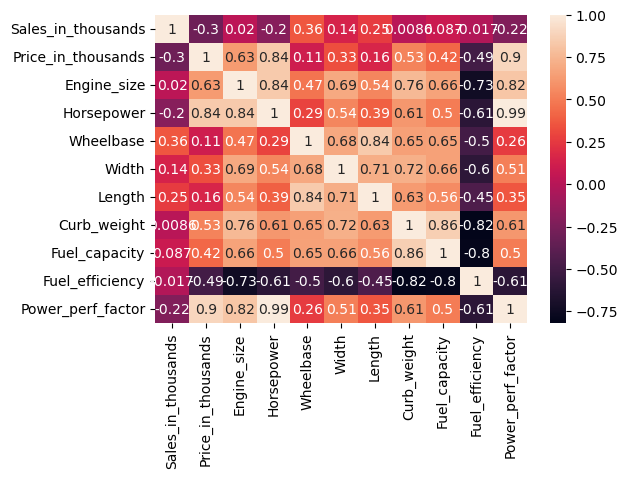

In [93]:
d=cars.select_dtypes('number').corr()
sns.heatmap(d,annot=True)
plt.show()

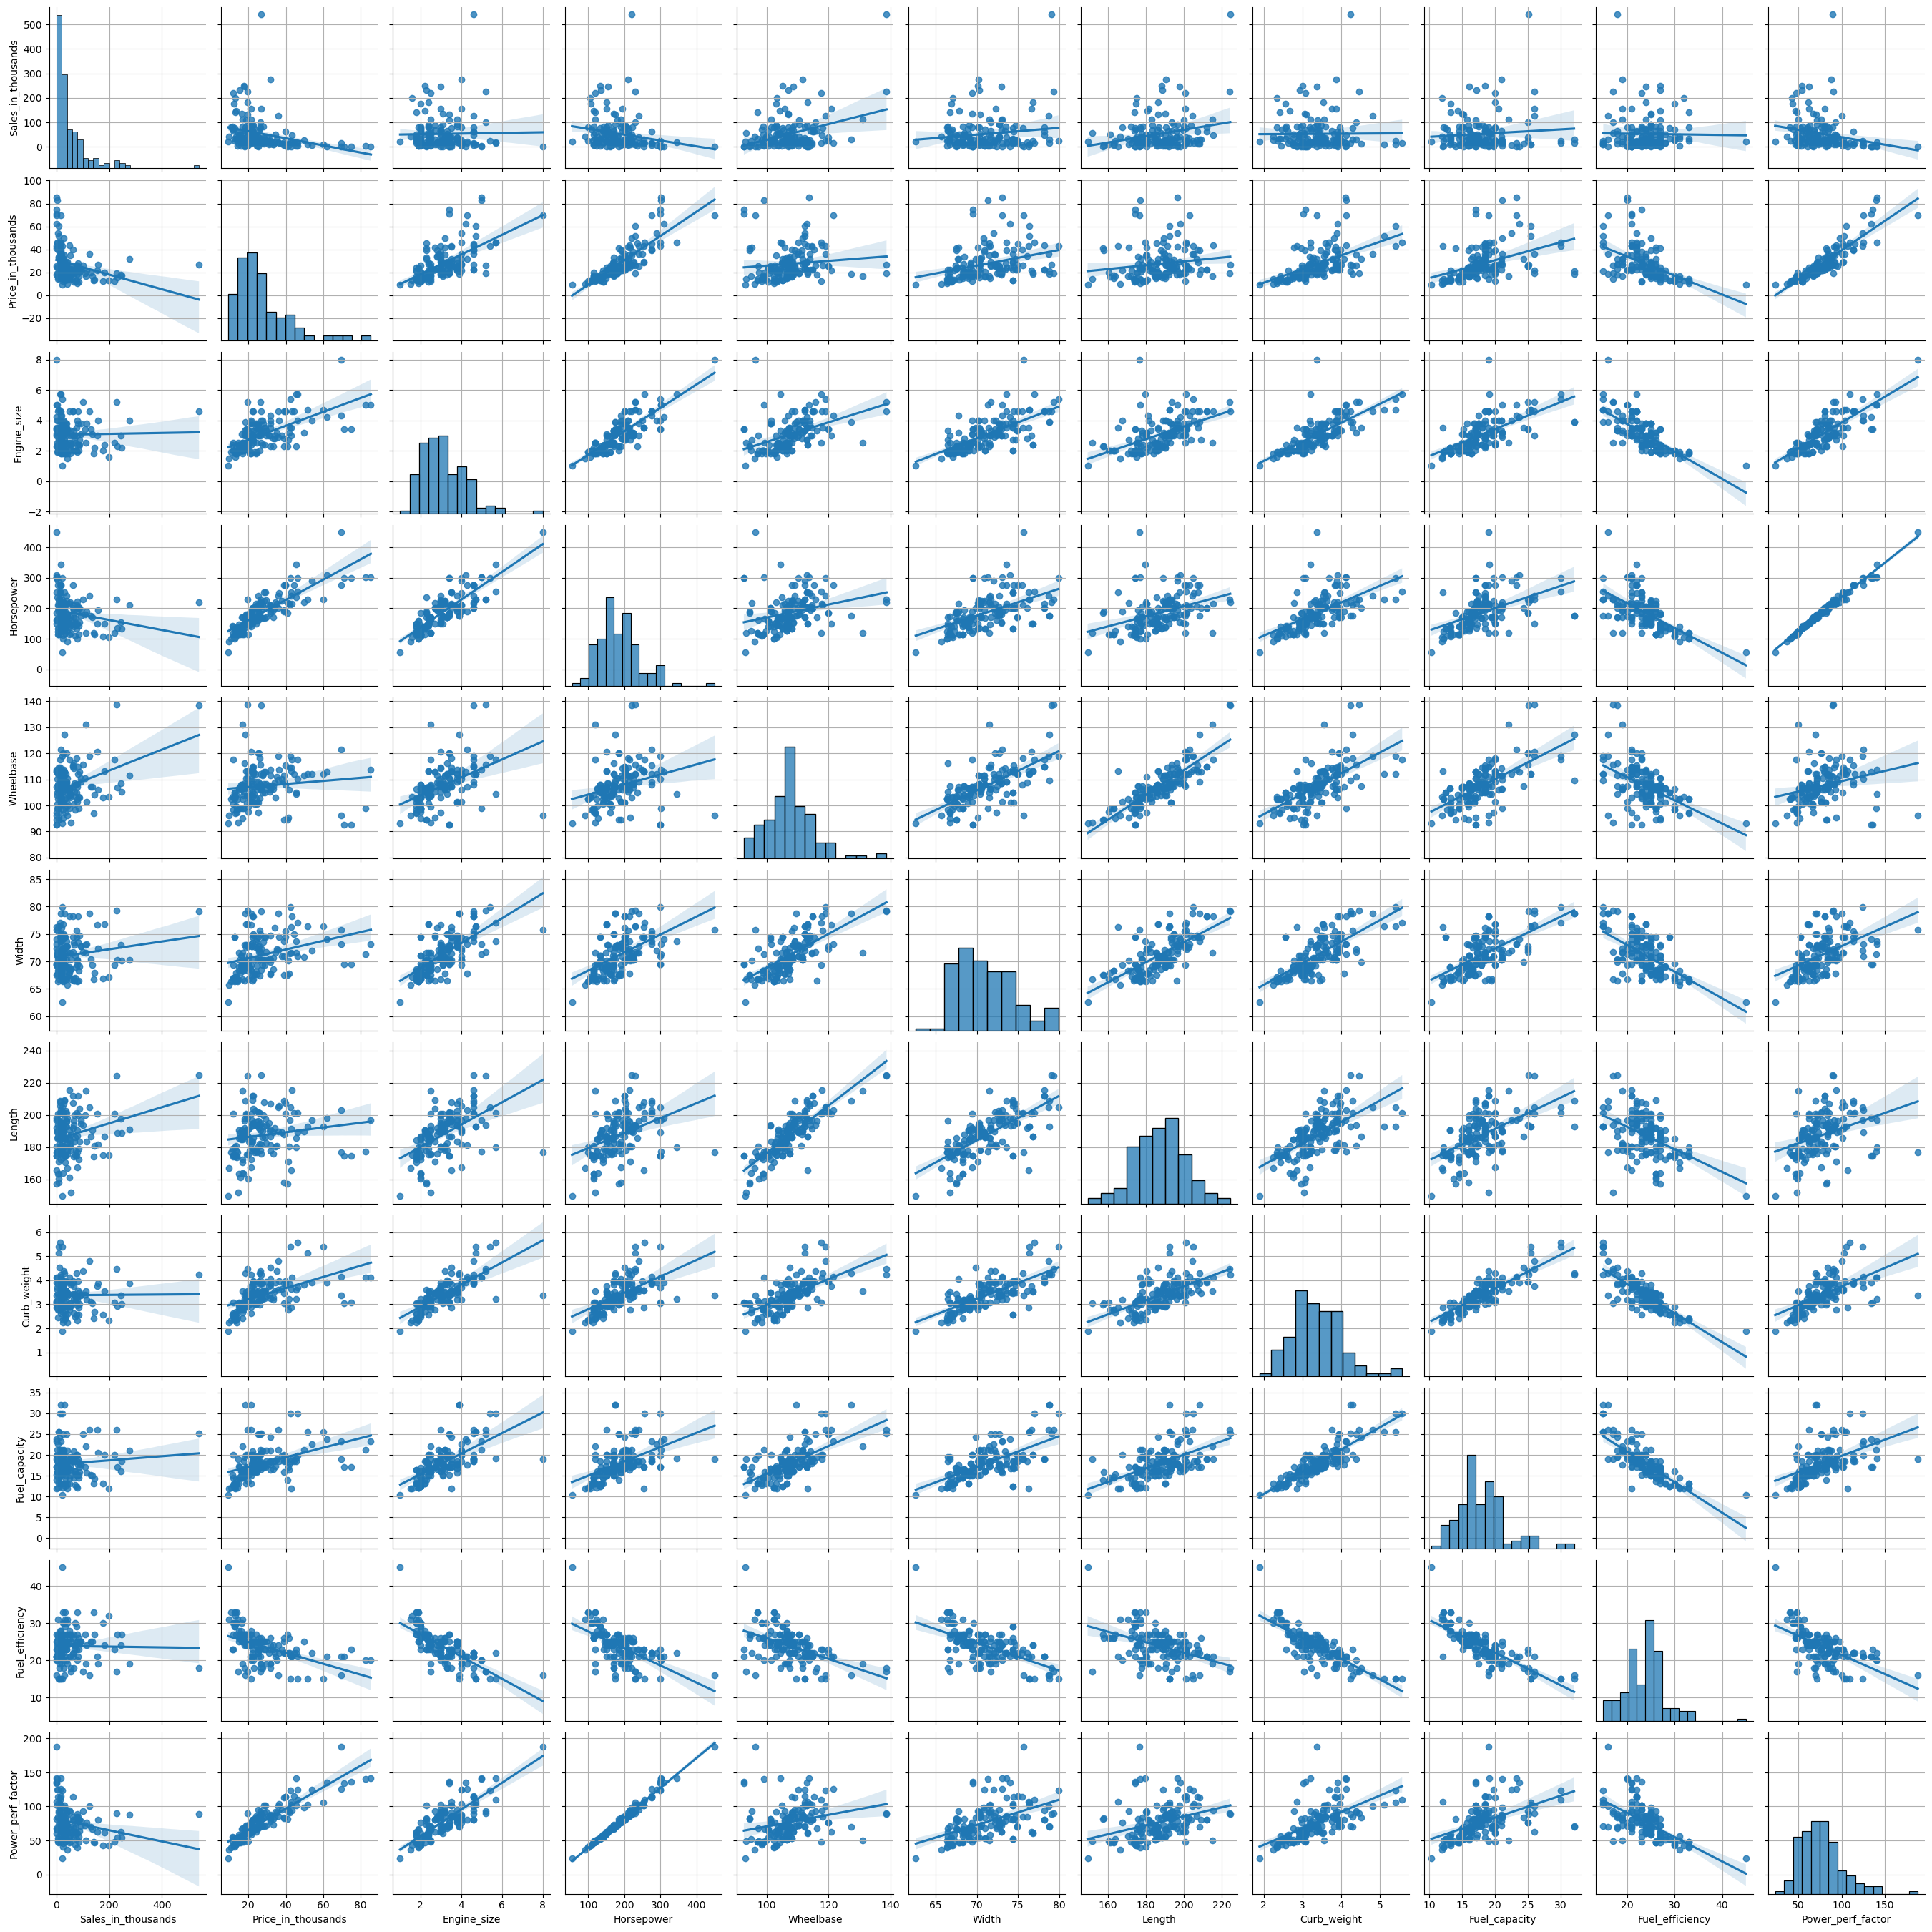

In [27]:
sns.pairplot(cars.select_dtypes('float'),kind='reg')

In [28]:
#here we are using profiling because to understand more briefly on our data

from pandas_profiling import ProfileReport 

rp = ProfileReport(cars,explorative=True)

rp.to_file('my_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\Deepika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


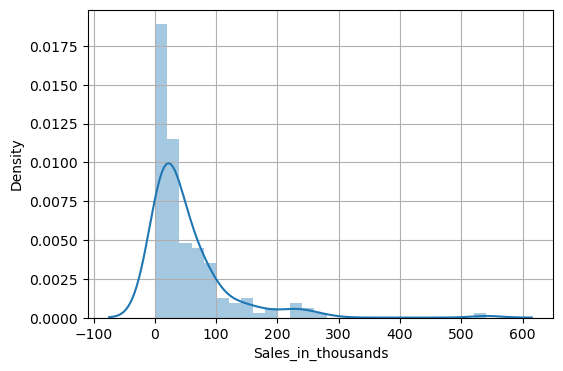

In [94]:
#checking whether target variable is normally distributed or not
sns.distplot(cars[target_col])
plt.show()

C:\Users\Deepika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


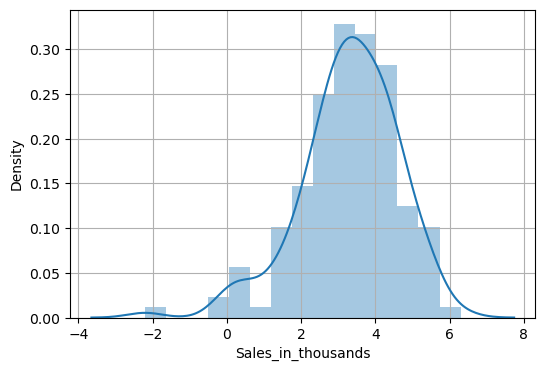

In [95]:
#from above diagram we observe that it left skewed so to make normalize we use log function
#if it is right skewed then we use boxcox we can even use log function too
sns.distplot(np.log(cars[target_col]))
plt.show()

# Data Preparation

In [96]:
#The objective of this stage is to prepare our data to feed it to the model

In [97]:
#for this procedure we need to split a data into train and test
#here we split the data by 80% of train and 20% of test
x_train,x_test ,y_train,y_test = train_test_split(cars[feature_col],cars[target_col],test_size=0.2,random_state=12345)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(124, 13)
(32, 13)
(124,)
(32,)


In [98]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 96 to 29
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Curb_weight         123 non-null    float64       
 1   Engine_size         124 non-null    float64       
 2   Fuel_capacity       124 non-null    float64       
 3   Fuel_efficiency     122 non-null    float64       
 4   Horsepower          124 non-null    float64       
 5   Latest_Launch       124 non-null    datetime64[ns]
 6   Length              124 non-null    float64       
 7   Manufacturer        124 non-null    object        
 8   Power_perf_factor   124 non-null    float64       
 9   Price_in_thousands  124 non-null    float64       
 10  Vehicle_type        124 non-null    object        
 11  Wheelbase           124 non-null    float64       
 12  Width               124 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memor

In [99]:
x_train.select_dtypes(np.number).describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Power_perf_factor,Price_in_thousands,Wheelbase,Width
count,123.000000,124.000000,124.000000,122.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,3.396236,3.093548,18.087903,23.663934,185.612903,186.798387,77.056845,27.479355,107.238710,71.288710
std,0.656506,1.062498,4.025520,4.486178,55.365557,13.800736,24.607375,14.223204,7.463273,3.580735
min,1.895000,1.000000,10.300000,15.000000,55.000000,149.400000,23.276272,9.235000,92.600000,62.600000
10%,2.599600,1.930000,13.200000,18.000000,120.000000,171.390000,48.410215,14.077900,97.560000,66.900000
20%,2.919400,2.000000,15.200000,21.000000,140.000000,175.040000,57.566502,17.169400,100.980000,67.860000
30%,3.044200,2.400000,16.000000,21.300000,152.700000,178.180000,62.344016,19.355700,103.190000,68.900000
40%,3.191000,2.700000,16.920000,23.000000,170.000000,183.220000,69.824635,21.570000,105.920000,70.100000
50%,3.340000,3.000000,17.350000,24.000000,180.000000,186.450000,72.897067,23.099500,107.050000,70.750000
60%,3.489600,3.300000,18.500000,25.000000,194.800000,191.780000,80.628492,26.007000,108.460000,72.080000


In [100]:
#from above we can interpret by mean and std if std is  very than mean(huge difference) there is a lots of dispersion in the data
#as well as min and max to check the outliers by next value i.e for min with 10% and for max with 90%

<AxesSubplot:>

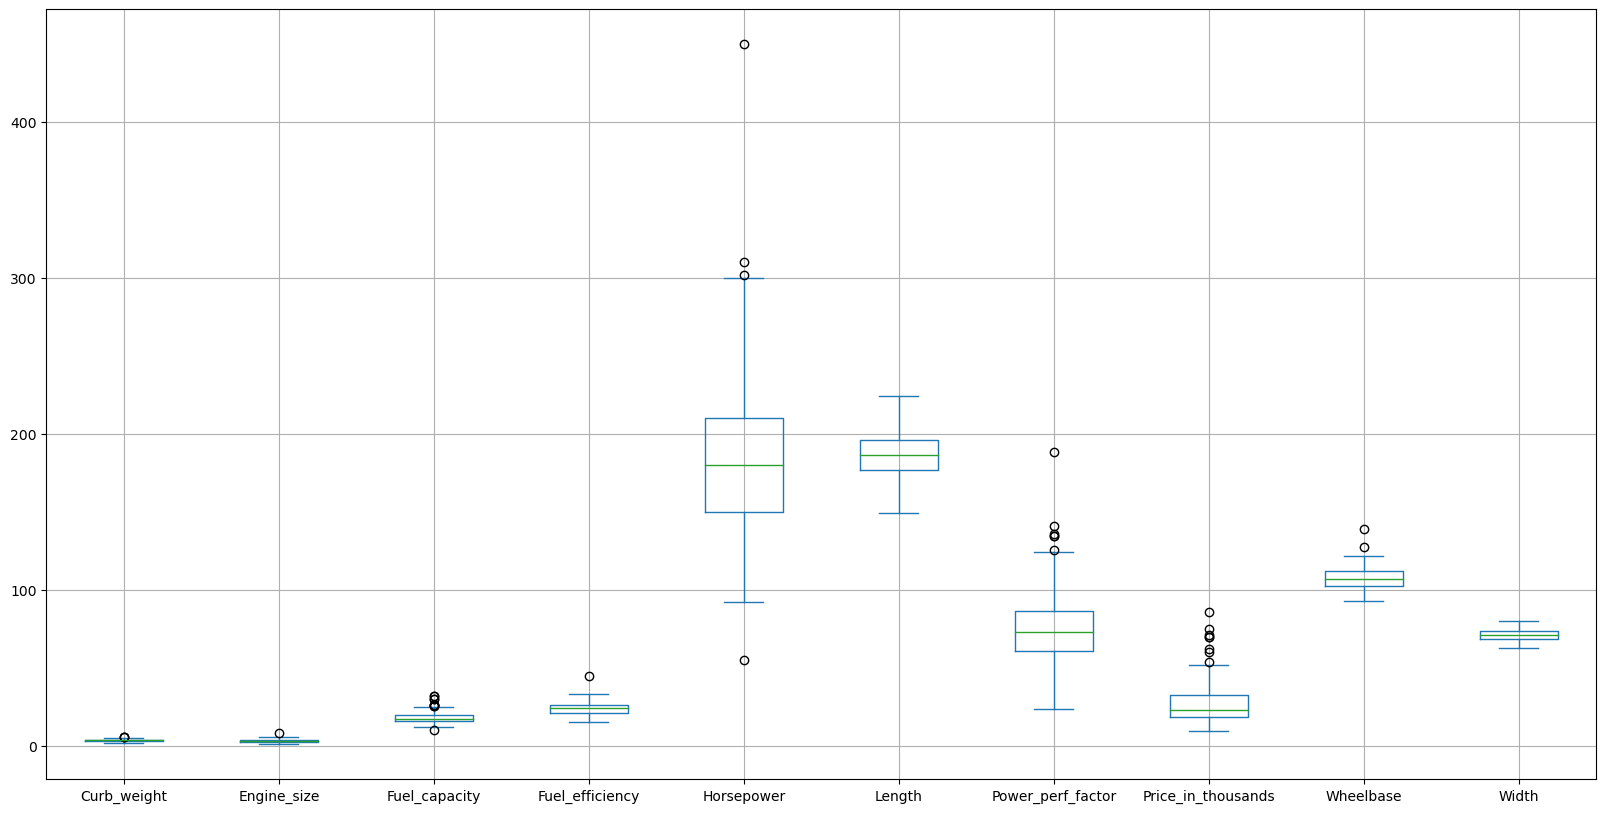

In [101]:
#from the figure we observe more outliers to upward and few columns as downward outlier
x_train.plot(kind='box',figsize=[20,10]) 

In [102]:
#here I am splitting latest launch to the days beacuse to know that when the product has launched  till today what is the effect 

x_train['Days_since_launch'] = (dt.datetime.now() - x_train['Latest_Launch']).dt.days
x_train = x_train.drop(columns=['Latest_Launch'])

x_train

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer,Power_perf_factor,Price_in_thousands,Vehicle_type,Wheelbase,Width,Days_since_launch
96,3.055,2.3,15.9,26.0,190.0,157.9,Mercedes-B,82.807362,38.900,Passenger,94.5,67.5,4399
142,2.668,2.0,15.3,27.0,127.0,163.8,Toyota,51.955109,16.888,Car,94.9,66.7,4289
66,3.650,3.0,18.4,21.0,240.0,191.3,Jaguar,102.178985,42.800,Passenger,114.5,71.6,3742
100,4.387,3.2,19.0,20.0,215.0,180.6,Mercedes-B,90.495532,35.300,Car,111.0,72.2,4374
123,3.942,3.4,25.0,23.0,185.0,201.3,Pontiac,76.208440,25.635,Car,120.0,72.7,3846
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2.567,2.0,12.5,29.0,132.0,174.4,Dodge,52.084899,12.640,Passenger,105.0,74.4,4069
102,3.012,2.4,15.9,25.0,155.0,183.5,Nissan,63.313728,20.390,Passenger,103.1,69.1,4201
127,3.280,2.3,18.5,23.0,170.0,189.2,Saab,73.503778,33.120,Passenger,106.4,70.6,3736
130,2.367,1.9,12.1,33.0,100.0,180.0,Saturn,40.700072,12.535,Passenger,102.4,66.4,4340


In [103]:
x_train.Manufacturer.value_counts()

Dodge         9
Toyota        8
Ford          8
Mercedes-B    7
Mitsubishi    7
Chevrolet     7
Nissan        6
Pontiac       6
Volkswagen    5
Volvo         5
Oldsmobile    5
Mercury       4
Chrysler      4
Plymouth      4
Cadillac      3
Honda         3
Acura         3
Lincoln       3
Porsche       3
Hyundai       3
Lexus         3
BMW           3
Buick         3
Jeep          3
Audi          2
Saab          2
Saturn        2
Subaru        1
Jaguar        1
Infiniti      1
Name: Manufacturer, dtype: int64

In [104]:
#from above we see that some brand manufactured very less so we can drop it or put in others and then drop
#normally more than 5 is considered to be good

In [105]:
# Assigning manafactuter with less variance / fewer examples to 'Others'
#b means boolean

b = (x_train.Manufacturer.value_counts() > 5)
final_manf =  x_train.Manufacturer.value_counts().index[b]

x_train['Manufacturer'] = np.where(x_train['Manufacturer'].isin( final_manf),x_train.Manufacturer,'Others')

In [106]:
x_train

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer,Power_perf_factor,Price_in_thousands,Vehicle_type,Wheelbase,Width,Days_since_launch
96,3.055,2.3,15.9,26.0,190.0,157.9,Mercedes-B,82.807362,38.900,Passenger,94.5,67.5,4399
142,2.668,2.0,15.3,27.0,127.0,163.8,Toyota,51.955109,16.888,Car,94.9,66.7,4289
66,3.650,3.0,18.4,21.0,240.0,191.3,Others,102.178985,42.800,Passenger,114.5,71.6,3742
100,4.387,3.2,19.0,20.0,215.0,180.6,Mercedes-B,90.495532,35.300,Car,111.0,72.2,4374
123,3.942,3.4,25.0,23.0,185.0,201.3,Pontiac,76.208440,25.635,Car,120.0,72.7,3846
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2.567,2.0,12.5,29.0,132.0,174.4,Dodge,52.084899,12.640,Passenger,105.0,74.4,4069
102,3.012,2.4,15.9,25.0,155.0,183.5,Nissan,63.313728,20.390,Passenger,103.1,69.1,4201
127,3.280,2.3,18.5,23.0,170.0,189.2,Others,73.503778,33.120,Passenger,106.4,70.6,3736
130,2.367,1.9,12.1,33.0,100.0,180.0,Others,40.700072,12.535,Passenger,102.4,66.4,4340


In [107]:
#Outlier treatment
#applying clip

for i in x_train.select_dtypes(np.number):
    lower_bound = x_train[i].quantile(0.01)
    upper_bound = x_train[i].quantile(0.99)
    x_train[i] = np.clip(x_train[i],lower_bound,upper_bound)

In [108]:
x_train.select_dtypes(np.number).describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Power_perf_factor,Price_in_thousands,Wheelbase,Width,Days_since_launch
count,123.000000,124.000000,124.000000,122.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,3.397658,3.079032,18.093758,23.565574,184.782258,186.755000,76.781198,27.391315,107.126677,71.309613,4079.442903
std,0.646084,0.981807,3.976642,4.132091,50.415847,13.494971,22.902944,13.836830,7.071235,3.510229,235.334980
min,2.242200,1.569000,11.923000,15.000000,93.840000,153.219000,37.598675,10.182000,92.715000,65.861000,3692.460000
10%,2.599600,1.930000,13.200000,18.000000,120.000000,171.390000,48.410215,14.077900,97.560000,66.900000,3771.000000
20%,2.919400,2.000000,15.200000,21.000000,140.000000,175.040000,57.566502,17.169400,100.980000,67.860000,3870.200000
30%,3.044200,2.400000,16.000000,21.300000,152.700000,178.180000,62.344016,19.355700,103.190000,68.900000,3941.400000
40%,3.191000,2.700000,16.920000,23.000000,170.000000,183.220000,69.824635,21.570000,105.920000,70.100000,3996.800000
50%,3.340000,3.000000,17.350000,24.000000,180.000000,186.450000,72.897067,23.099500,107.050000,70.750000,4070.000000
60%,3.489600,3.300000,18.500000,25.000000,194.800000,191.780000,80.628492,26.007000,108.460000,72.080000,4150.200000


In [109]:
# Univariate Missing imputation
# for numeric columns we can impute it with either the mean or the median(but here we are using median) 
# for categoricals we can impute it with the mode 

x_train.loc[x_train.isna().sum(axis=1)>0] #checking the missing values present

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer,Power_perf_factor,Price_in_thousands,Vehicle_type,Wheelbase,Width,Days_since_launch
38,3.489,2.7,17.0,NaN,202.0,203.7,Dodge,80.831470,22.505,Passenger,113.0,74.7,3896.0
109,3.455,3.5,18.0,NaN,215.0,195.9,Others,86.272523,24.150,Passenger,109.0,73.6,4324.0
15,NaN,4.6,18.5,22.0,275.0,201.0,Others,115.621358,44.475,Passenger,112.2,75.0,4296.0


In [110]:
# Missing Value treatment
missing_imputer={}
for i in x_train:
    if pd.api.types.is_number(x_train[i]):
        missing_imputer[i] = x_train[i].median()
    else:
        missing_imputer[i] = x_train[i].mode()[0]
        

missing_imputer

{'Curb_weight': 2.2422,
 'Engine_size': 2.0,
 'Fuel_capacity': 18.5,
 'Fuel_efficiency': 25.0,
 'Horsepower': 150.0,
 'Length': 186.3,
 'Manufacturer': 'Others',
 'Power_perf_factor': 37.5986750132,
 'Price_in_thousands': 10.182,
 'Vehicle_type': 'Passenger',
 'Wheelbase': 112.2,
 'Width': 66.7,
 'Days_since_launch': 4852.0}

In [111]:
x_train = x_train.fillna(missing_imputer)

In [112]:
# Dealing with categoricals

x_train = pd.get_dummies(x_train,columns=['Manufacturer','Vehicle_type']).drop(columns=['Manufacturer_Others','Vehicle_type_Passenger'])

In [113]:
x_train

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Power_perf_factor,Price_in_thousands,Wheelbase,Width,Days_since_launch,Manufacturer_Chevrolet,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Mercedes-B,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Pontiac,Manufacturer_Toyota,Vehicle_type_Car
96,3.055,2.3,15.9,26.0,190.0,157.9,82.807362,38.900,94.5,67.5,4399.0,0,0,0,1,0,0,0,0,0
142,2.668,2.0,15.3,27.0,127.0,163.8,51.955109,16.888,94.9,66.7,4289.0,0,0,0,0,0,0,0,1,1
66,3.650,3.0,18.4,21.0,240.0,191.3,102.178985,42.800,114.5,71.6,3742.0,0,0,0,0,0,0,0,0,0
100,4.387,3.2,19.0,20.0,215.0,180.6,90.495532,35.300,111.0,72.2,4374.0,0,0,0,1,0,0,0,0,1
123,3.942,3.4,25.0,23.0,185.0,201.3,76.208440,25.635,120.0,72.7,3846.0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2.567,2.0,12.5,29.0,132.0,174.4,52.084899,12.640,105.0,74.4,4069.0,0,1,0,0,0,0,0,0,0
102,3.012,2.4,15.9,25.0,155.0,183.5,63.313728,20.390,103.1,69.1,4201.0,0,0,0,0,0,1,0,0,0
127,3.280,2.3,18.5,23.0,170.0,189.2,73.503778,33.120,106.4,70.6,3736.0,0,0,0,0,0,0,0,0,0
130,2.367,1.9,12.1,33.0,100.0,180.0,40.700072,12.535,102.4,66.4,4340.0,0,0,0,0,0,0,0,0,0


In [114]:
x_train = x_train.convert_dtypes()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 96 to 29
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Curb_weight              124 non-null    Float64
 1   Engine_size              124 non-null    Float64
 2   Fuel_capacity            124 non-null    Float64
 3   Fuel_efficiency          124 non-null    Int64  
 4   Horsepower               124 non-null    Float64
 5   Length                   124 non-null    Float64
 6   Power_perf_factor        124 non-null    Float64
 7   Price_in_thousands       124 non-null    Float64
 8   Wheelbase                124 non-null    Float64
 9   Width                    124 non-null    Float64
 10  Days_since_launch        124 non-null    Float64
 11  Manufacturer_Chevrolet   124 non-null    UInt8  
 12  Manufacturer_Dodge       124 non-null    UInt8  
 13  Manufacturer_Ford        124 non-null    UInt8  
 14  Manufacturer_Mercedes-B  1

# Feature Selection

In [115]:
#the main objective of this is to reduce the feature without interfering on the performance of the data
#before selecting the feature lets make preliminary model

In [116]:
from statsmodels.api import OLS
from statsmodels.api import add_constant #to know the intercept


model = OLS(np.log(y_train.astype(float)),add_constant(x_train.astype(float)))

model = model.fit() 


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Sales_in_thousands   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     7.360
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           2.17e-12
Time:                        12:30:38   Log-Likelihood:                -155.48
No. Observations:                 124   AIC:                             353.0
Df Residuals:                     103   BIC:                             412.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [117]:
from sklearn import metrics

def validate(true, predict):
    
    
    print('MAE:', metrics.mean_absolute_error(true, predict))
    print('MAPE:', metrics.mean_absolute_percentage_error(true, predict))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(true, predict)))
    print('R2:', metrics.r2_score(true, predict))

In [118]:
validate(np.log(y_train),model.predict(add_constant(x_train)))

MAE: 0.6190318132106907
MAPE: 0.5629315684618392
RMSE: 0.8478194555513284
R2: 0.5883145468505531


In [119]:
# why we need to reduce feature because in order to reduce
#1] to overcome multicollinearity
#2] outliers which arise to overfitting issue

#whats the advantage
#1] reduce multicollinarity
#2] reduce outlier that is reduce overfitting
#3] faster inference as feature reduces
#4] train data will be faster
#5] curse of dimensionality (atleast 1 column should have 5 rows otherwise not fit for model)




# P Values 




In [120]:
# meaning: the probabilty of the coeff being 0

# if p is high feature will die 
# if p is low feature will fly  

#thumb rule:  we will drop the feature if p is greater than 5% -10 %



print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Sales_in_thousands   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     7.360
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           2.17e-12
Time:                        12:30:44   Log-Likelihood:                -155.48
No. Observations:                 124   AIC:                             353.0
Df Residuals:                     103   BIC:                             412.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [121]:
f1 = model.pvalues.index[model.pvalues < 0.1] 

f1

Index(['Manufacturer_Dodge', 'Manufacturer_Ford', 'Manufacturer_Mitsubishi',
       'Manufacturer_Toyota', 'Vehicle_type_Car'],
      dtype='object')

# VIF (VARIANCE INFLATION FACTOR)

In [122]:
# used for selecting the feature 
# aS long as all the columns VIF is less than 5 the model will still be interpretable 

In [123]:
def VIF(x, drop=[]):
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    x = x.drop(columns=drop)
    output = pd.DataFrame()
    output['Columns'] = x.columns
    x = x.values.astype(float)
    output['VIF'] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]

    return output.sort_values('VIF', ascending=False)

In [124]:
d = VIF(x_train,drop=['Power_perf_factor', 'Length', 'Width', 'Wheelbase',
        'Curb_weight', 'Days_since_launch', 'Horsepower', 'Fuel_capacity', 'Engine_size']) 

d 

,Columns,VIF
0,Fuel_efficiency,4.831410
1,Price_in_thousands,4.290886
10,Vehicle_type_Car,1.589376
5,Manufacturer_Mercedes-B,1.219217
9,Manufacturer_Toyota,1.199411
2,Manufacturer_Chevrolet,1.184419
4,Manufacturer_Ford,1.174979
3,Manufacturer_Dodge,1.173384
7,Manufacturer_Nissan,1.163061
6,Manufacturer_Mitsubishi,1.108376


In [125]:
f2 = set(d.Columns)

In [126]:
f3= ['Manufacturer_Mercedes-B','Manufacturer_Toyota','Manufacturer_Toyota','Manufacturer_Nissan']

In [127]:
final_cols = f1.union(f2).difference(f3)
x_train = x_train[final_cols]

final_cols

Index(['Fuel_efficiency', 'Manufacturer_Chevrolet', 'Manufacturer_Dodge',
       'Manufacturer_Ford', 'Manufacturer_Mitsubishi', 'Manufacturer_Pontiac',
       'Price_in_thousands', 'Vehicle_type_Car'],
      dtype='object')

In [128]:
#again checking the summary to verify the performance of data wether it is retained or not
#ofcourse when the feature is less R2 reduces but the value should not be differing very high

model = OLS(np.log(y_train.astype(float)),add_constant(x_train.astype(float)))

model = model.fit() 


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Sales_in_thousands   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     12.75
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           5.38e-13
Time:                        12:30:53   Log-Likelihood:                -171.13
No. Observations:                 124   AIC:                             360.3
Df Residuals:                     115   BIC:                             385.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [130]:
validate(np.log(y_train),model.predict(add_constant(x_train)))

MAE: 0.6941685833802788
MAPE: 0.803814930755099
RMSE: 0.9619258735010073
R2: 0.47004135939206104


# MODEL EVALUATION

In [131]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [132]:
#here we are implementing the changes done in train data into a test data to perfectly build a model otherwise error outputs

def process_test_data(Data):
    Data['Days_since_launch'] = (dt.datetime.now() - Data['Latest_Launch']).dt.days
    Data = Data.drop(columns=['Latest_Launch'])
    Data['Manufacturer'] = np.where(Data['Manufacturer'].isin( final_manf),Data.Manufacturer,'Others')
    Data = Data.fillna(missing_imputer)
    Data = pd.get_dummies(Data,columns=['Manufacturer','Vehicle_type']).drop(columns=['Manufacturer_Others','Vehicle_type_Passenger'])
    for j in [i for i in final_cols if i not in Data.columns]:
        Data[j] = 0
    Data = Data[final_cols]
    
    return Data.convert_dtypes()


In [133]:
def validate(true, predict):
    from sklearn import metrics
    
    print('MAE:', metrics.mean_absolute_error(true, predict))
    print('MAE / Mean:', metrics.mean_absolute_error(true, predict) / true.mean())
    print('RMSE:', np.sqrt(metrics.mean_squared_error(true, predict)))
    print('R2:', metrics.r2_score(true, predict))
    print('MAPE:', metrics.mean_absolute_percentage_error(true, predict)) 
    
    
    plt.hist(true - predict)
    
    plt.show()

MAE: 47.88994911231098
MAE / Mean: 14.582993692578471
RMSE: 57.73503052351908
R2: -1908.1390644406495
MAPE: 23.436451805261864


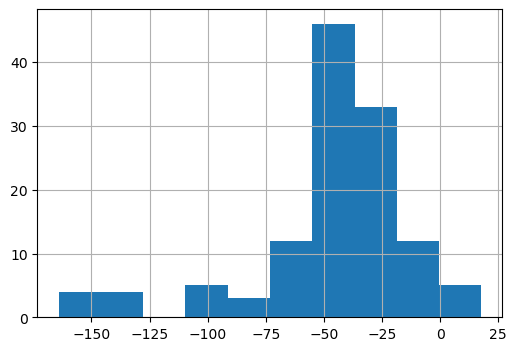

In [134]:
validate(np.log(y_train),model.predict(x_train))

MAE: 50.36004380905317
MAE / Mean: 15.165446623410155
RMSE: 61.48886413682768
R2: -2236.5337612242874
MAPE: 15.686665122451508


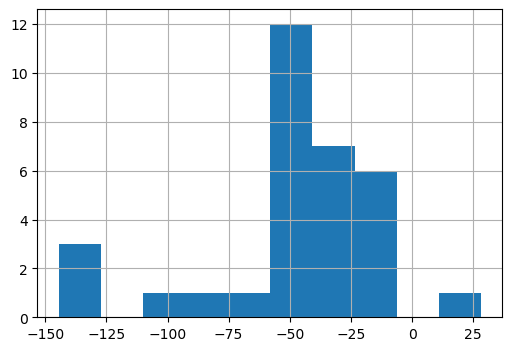

In [135]:
validate(np.log(y_test),model.predict(process_test_data(x_test)))

In [136]:
#The units are different it will not be possible to interpret 

# MAke the units the same 

# Z- Transformation 


z_train = (x_train - x_train.mean()) / x_train.std()

In [137]:
from statsmodels.api import OLS

model = OLS(np.log(y_train).astype(float),add_constant(z_train).astype(float))

model = model.fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Sales_in_thousands   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     12.75
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           5.38e-13
Time:                        12:41:49   Log-Likelihood:                -171.13
No. Observations:                 124   AIC:                             360.3
Df Residuals:                     115   BIC:                             385.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.2840      0.090     36.610      0.000       3.106       3.462
Fuel_efficiency            -0.0367      0.163     -0.226      0.822      -0.359       0.285
Manufacturer_Chevrolet      0.0593      0.094      0.630      0.530      -0.127       0.246
Manufacturer_Dodge          0.0946      0.096      0.987      0.326      -0.095       0.284
Manufacturer_Ford           0.3108      0.093      3.339      0.001       0.126       0.495
Manufacturer_Mitsubishi    -0.2528      0.093     -2.713      0.008      -0.437      -0.068
Manufacturer_Pontiac        0.1259      0.092      1.375      0.172      -0.055       0.307
Price_in_thousands         -0.7128      0.127     -5.598      0.000      -0.965      -0.461
Vehicle_type_Car            0.2511      0.135      1.864      0.065      -0.016       0.518
==============================================================================
Omnibus:                       32.452   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.720
Skew:                          -1.039   Prob(JB):                     9.82e-17
Kurtosis:                       6.155   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
model.params

const                      3.283959
Fuel_efficiency           -0.036743
Manufacturer_Chevrolet     0.059345
Manufacturer_Dodge         0.094568
Manufacturer_Ford          0.310801
Manufacturer_Mitsubishi   -0.252844
Manufacturer_Pontiac       0.125877
Price_in_thousands        -0.712819
Vehicle_type_Car           0.251061
dtype: float64